In [20]:
import torch
import torchvision
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F

In [21]:
#You can change the download to True if you don't have MNIST in your device
train=datasets.MNIST("",train=True,download=False,transform=transforms.Compose([transforms.ToTensor()]))

In [22]:
test=datasets.MNIST("",train=False,download=False,transform=transforms.Compose([transforms.ToTensor()]))
batch=16

In [23]:
train_set=torch.utils.data.DataLoader(train,batch_size=batch,shuffle=True)
test_set=torch.utils.data.DataLoader(test,batch_size=batch,shuffle=True)

In [24]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4=nn.Linear(64,10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

net = Net()
net

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [25]:
import torch.optim as optim
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [26]:
loss_list=[]
correct=0
total=0            
for epoch in range(10):
    for data in train_set:  
        X, Y = data  
        net.zero_grad()
        output = net(X.view(-1,784)) 
        loss = loss_function(output, Y) 
        loss_list.append(loss.item())
        loss.backward()  
        optimizer.step()
        for idx, i in enumerate(output):
            if torch.argmax(i) == Y[idx]:
                correct += 1
            total += 1
    print("For iteration:",epoch+1,"Loss is:",loss.item(),"Accuracy is:",(correct/total)*100)  

For iteration: 1 Loss is: 0.005222260486334562 Accuracy is: 92.30166666666668
For iteration: 2 Loss is: 0.009805669076740742 Accuracy is: 94.48333333333333
For iteration: 3 Loss is: 0.018711818382143974 Accuracy is: 95.52888888888889
For iteration: 4 Loss is: 0.1507033109664917 Accuracy is: 96.16083333333333
For iteration: 5 Loss is: 0.0006889878422953188 Accuracy is: 96.60666666666667
For iteration: 6 Loss is: 0.07353829592466354 Accuracy is: 96.94305555555556
For iteration: 7 Loss is: 0.03903234004974365 Accuracy is: 97.2154761904762
For iteration: 8 Loss is: 0.1165575310587883 Accuracy is: 97.43437499999999
For iteration: 9 Loss is: 0.00032704457407817245 Accuracy is: 97.61888888888889
For iteration: 10 Loss is: 0.0027950992807745934 Accuracy is: 97.7715


In [27]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_set:
        X, Y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            if torch.argmax(i) == Y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", (correct/total)*100)

Accuracy:  97.87


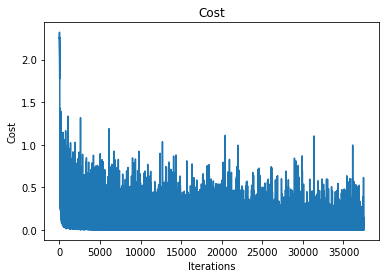

In [28]:
import matplotlib.pyplot as plt
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost')
plt.show()

In [29]:
#NOW, TESTING THE ABOVE CODE

Given Image is 4


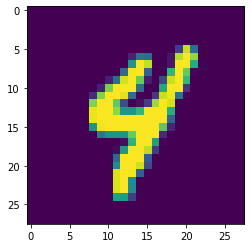

In [31]:
import numpy as np
train_set = datasets.MNIST('./data', train=True, download=False)
test_set = datasets.MNIST('./data', train=False, download=False)
train_img = train_set.data.numpy()
test_img = test_set.data.numpy()
img_tensor=transforms.ToTensor()
req=test_img[4514]
req=img_tensor(req)
plt.imshow(np.squeeze(test_img[4514]))
req=req.view(-1,784)
output=net(req)
prediction=torch.max(output,1)[1]
print("Given Image is",prediction.item())